[View in Colaboratory](https://colab.research.google.com/github/restrepo/Activities-2018-2/blob/master/Homework_8_1007790895.ipynb)

## Least action

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import numpy as np
import pandas as pd

### Solution to a free fall problem
\begin{align}
 x=&-\frac{1}{2} g t^2+v_0 t \,, & v=&-g t +v_0
\end{align}
At maximum height $t=t_{\text{end}}/2$ and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+v_0 \frac{t_{\text{end}}}{2} \,, & 0=&-g \frac{t_{\text{end}}}{2} +v_0
\end{align}
From the second equation $v_0=g t_{\text{end}}/2=14.7$ m/s, and
\begin{align}
 x_{\text{max}}=&-\frac{1}{2} g (t_{\text{end}}/2)^2+ g \frac{t_{\text{end}}}{2} \frac{t_{\text{end}}}{2} \nonumber\\
 =&g\frac{ t_{\text{end}}^2  }{8}=11.025\ \text{m}\,.
\end{align}

__Activity__: Find the same solution by fitting the polynomial of degree 2 that go trough the points: 
* $(t_0,x_0)=(0,0)$,  
* $(t_{\rm end}/2,x_{\rm max})=(11.025,1.5)$, 
* $(t_{\rm end},x_{\rm end})=(0,3)$, in s and m respectively.

In [4]:
df=pd.DataFrame( {'t':[0,1.5,3],
                  'x':[0,11.025,0]
     })
df

,t,x
0,0.0,0.000
1,1.5,11.025
2,3.0,0.000


In [5]:
df.loc[1,'x']=11.025 
coeff=np.polyfit(df.t,df.x,deg=2)
x=np.poly1d(coeff,variable='t')
print(x)

      2
-4.9 t + 14.7 t + 8.205e-15


NameError: ignored

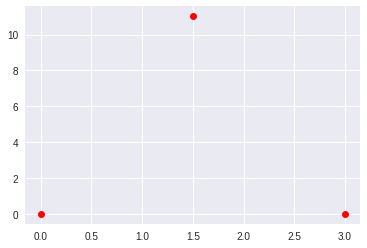

In [6]:
plt.plot(df.t,df.x,'ro')
plt.plot(t,x(t))
#plt.grid()

## Least Action for the free fall problem

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/leastaction.png?raw=1">
</div>

### Geometry interpretation
Following the geometry theory developed [here](http://www.eftaylor.com/software/ActionApplets/LeastAction.html), we will try to define something called the _Action_ for one small segment of the free fall movement in one-dimension. 

For that we need the experimental data consisting on the height of an object of mass $m$ in free fall, and the height $x_i$, for each time $t_i$. This data would be fitted by a polynomial of degree two, as displayed in the figure for one of the fitted segments of the plot of $x$ as a function of $t$. We take the origin of the coordinates at ground level. For each segment we can calculate an average kinetic energy, $T$, and an averge potential energy, $V$, in the limit of $\Delta t=t_2-t_1$ small. From the figure

\begin{align}
T_{12}=\frac12 m v^2\approx &\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2\,,&
V_{12}=mgh\approx& m g \frac{x_2+x_1}{2}\,.
\end{align}

We can then reformulate the problem of the free fall in the following terms. From all the possible curves that can interpolate the points $(t_1,x_1)$ and $(t_2,x_2)$, which is the correct one?. 

The answer, found by Euler can be obtained from the definition of the function "Lagrangian"
$$L(t)=T(t)-V(t)$$

We define the "Action" of one interpolating function between the points $(t_1,x_1)$ and $(t_2,x_2)$ as
$$S=\int_{t_1}^{t_2} L\, {\rm d}t $$

The result is that the correct interpolation, called the _physical trajectory_, is the one which has a _minumum_ value for the Action!

For one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sufficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S_1&=&\int_{t_1}^{t_2} L dt \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

__Activity__: 
1. Calculates 
$$S=\int_{t_{\rm min}}^{t_{\rm max}} L(t)\operatorname{d}t $$
for the physical trajectory of a particle in free fall of $m=0.2\ $kg, where
$$L(t)=\frac{1}{2}m v^2(t)-mgx(t)$$
_Hint_:
$$F(t)=\int L(t)\operatorname{d}t$$
$$S=F(t_{\rm max})-F(t_{\rm min})$$
1. Calculates also the instataneous energy
$$E(t)=\frac{1}{2}m v^2(t)+mgx(t)$$
for  several times.

In [7]:
xmax=11.025 
df.loc[1,'x']=xmax
coeff=np.polyfit(df.t,df.x,deg=2)
x=np.poly1d(coeff,variable='t')
print('x(t) [m]:\n',x)
print("="*45)
m=0.2
g=9.8
v=x.deriv()
L=0.5*m*v**2-m*g*x
E=0.5*m*v**2+m*g*x
F=L.integ() # Analytical integration
S=F( df.t.max() ) - F( df.t.min() ) 
print('for xmax={} m: S={:.1f} J.s  min: -21.6 J.s'.format(xmax,S))
print("="*45)
Deltat=0.2
#t=np.linspace(df.t.min() , df.t.max(),10)
t=np.arange(df.t.min() , df.t.max()+Deltat,Deltat)
print('instantaneous energy [J]:\n {}'.format(E(t)))

x(t) [m]:
       2
-4.9 t + 14.7 t + 8.205e-15
for xmax=11.025 m: S=-21.6 J.s  min: -21.6 J.s
instantaneous energy [J]:
 [21.609 21.609 21.609 21.609 21.609 21.609 21.609 21.609 21.609 21.609
 21.609 21.609 21.609 21.609 21.609 21.609]


__Activity__: Changes the maximum height for the previous activity and check what happens with the instantaneous energy.

## Comparision with non-physical trajectories

---



I good approximation to the integral is:
$$S=\int_{t_{\rm min}}^{t_{\rm max}} L(t)\operatorname{d}t\approx \sum_i \left[\frac{L(t_{i+1})+L(t_i)}{2}\right]\Delta t$$

In [8]:
print('Δt={}'.format( t[1:]-t[:-1] )  )

Δt=[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


In [9]:
print( 'S={:.1f} J.s'.format( 0.5*( L(t)[1:]+L(t)[:-1] ).sum()*Deltat ) )

S=-21.2 J.s


Or even more general

In [10]:
def Saprx(L,t):
    return   0.5*( L(t)[1:]+L(t)[:-1] )*(  t[1:]-t[:-1]  )  

print( 'S={:.1f} J.s'.format(  Saprx(L,t).sum() ) )

S=-21.2 J.s


S=-17.1  J.s
S=-21.6  J.s
S=-18.8  J.s


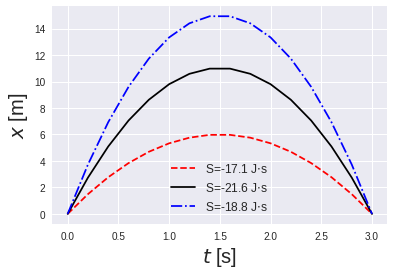

In [11]:
Ss=[]
Es=[]
m=0.2
g=9.8
Deltat=0.2
#t=np.linspace(df.t.min() , df.t.max(),10)
t=np.arange(df.t.min() , df.t.max()+Deltat,Deltat)
xmax=[6,11.025,15]; x0=0;xend=0
ls=['r--','k-','b-.']
for i in range(len(xmax) ):
    df=pd.DataFrame({'t':[t.min(),t.mean(),t.max()],'x':[x0,xmax[i],xend]})
    coeffs=np.polyfit(df.t,df.x,2)
    x=np.poly1d(coeffs,variable='t')
    v=x.deriv()
    L=0.5*m*v**2-m*g*x
    F=L.integ() # Analytical integration 
    E=0.5*m*v**2+m*g*x
    S=F( df.t.max() ) - F( df.t.min() )
    print('S={:.1f}  J.s'.format( S ) )
    Ss.append( Saprx(L,t)  )
    Es.append( E(t) )
    #Plot
    if ls:
        plt.plot(t,x(t),ls[i],label='S={:.1f} J$\cdot$s'.format( S  )   )

if ls:
    plt.legend(loc='best',fontsize=12)    
    plt.xlabel('$t$ [s]',size=20)
    plt.ylabel('$x$ [m]',size=20)

Only the physical trajectory conserves energy

In [12]:
Es

[array([ 6.4       ,  7.73404444,  8.87751111,  9.8304    , 10.59271111,
        11.16444444, 11.5456    , 11.73617778, 11.73617778, 11.5456    ,
        11.16444444, 10.59271111,  9.8304    ,  8.87751111,  7.73404444,
         6.4       ]),
 array([21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609,
        21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609, 21.609]),
 array([40.        , 37.36177778, 35.10044444, 33.216     , 31.70844444,
        30.57777778, 29.824     , 29.44711111, 29.44711111, 29.824     ,
        30.57777778, 31.70844444, 33.216     , 35.10044444, 37.36177778,
        40.        ])]

Approximated result

In [13]:
Ss[0].sum(),Ss[1].sum(),Ss[2].sum()

(-16.958577777777823, -21.224840000000114, -18.1831111111111)

__Activity__: Check that the Action of a trajectory with a polynomial of order $n$ which fits $n+1$ points with the same extreme values, gives an Action that is larger than the previous minimun

In [14]:
df

,t,x
0,0.0,0
1,1.5,15
2,3.0,0


In [15]:
ndf=df.append({'t':0.75,'x':9}, ignore_index=True)
ndf=ndf.append({'t':2.25,'x':3.76}, ignore_index=True)
ndf=ndf.sort_values('t')
ndf

,t,x
0,0.00,0.00
3,0.75,9.00
1,1.50,15.00
4,2.25,3.76
2,3.00,0.00


S=-12.9  J.s


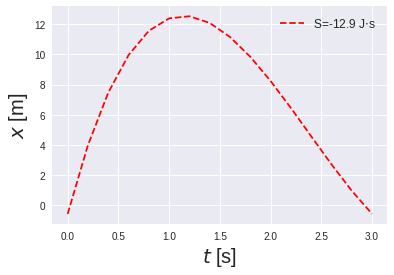

In [20]:
Ss=[]
Es=[]
m=0.2
g=9.8
Deltat=0.2
deg=3

t=np.arange(ndf.t.min() , ndf.t.max()+Deltat,Deltat)
xmax=[11.025]; x0=0;xend=0
ls=['r--','k-','b-.']
for i in range(len(xmax)):
    
    coeffs=np.polyfit(ndf.t,ndf.x,deg)
    x=np.poly1d(coeffs,variable='t')
    v=x.deriv()
    L=0.5*m*v**2-m*g*x
    F=L.integ() # Analytical integration 
    E=0.5*m*v**2+m*g*x
    S=F( ndf.t.max() ) - F( ndf.t.min() )
    print('S={:.1f}  J.s'.format( S ) )
    Ss.append( Saprx(L,t)  )
    Es.append( E(t) )
    #Plot
    if ls:
        plt.plot(t,x(t),ls[i],label='S={:.1f} J$\cdot$s'.format( S  )   )

if ls:
    plt.legend(loc='best',fontsize=12)    
    plt.xlabel('$t$ [s]',size=20)
    plt.ylabel('$x$ [m]',size=20)

In [19]:
Es

[array([64.47112893, 47.64427283, 36.5301893 , 29.78756325, 26.22318342,
        24.79194234, 24.59683635, 24.88896561, 25.06753406, 24.67984949,
        23.42132346, 21.13547137, 17.8139124 , 13.59636956,  8.77066966,
         3.77274332])]